In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd /content/drive/MyDrive/power-law-for-CI/

/content/drive/.shortcut-targets-by-id/1WmMCiW_WZOtTD6lhToYh8gj0m4_-qLXm/power-law-for-CI


In [18]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import importlib

In [19]:
from EWC_model import *
from train import train_EWC


In [20]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [21]:
print(device)

cuda


In [22]:
# -conv-layers
'''
        depth=depth,
        conv_type=args.conv_type if depth>0 else None,
        start_channels=args.channels if depth>0 else None,
        reducing_layers=args.rl if depth>0 else None,
        num_blocks=args.n_blocks if depth>0 else None,
        conv_bn=(True if args.conv_bn=="yes" else False) if depth>0 else None,
        conv_nl=args.conv_nl if depth>0 else None,
        no_fnl=True if depth>0 else None,
        global_pooling=checkattr(args, 'gp') if depth>0 else None,
'''


'\n        depth=depth,\n        conv_type=args.conv_type if depth>0 else None,\n        start_channels=args.channels if depth>0 else None,\n        reducing_layers=args.rl if depth>0 else None,\n        num_blocks=args.n_blocks if depth>0 else None,\n        conv_bn=(True if args.conv_bn=="yes" else False) if depth>0 else None,\n        conv_nl=args.conv_nl if depth>0 else None,\n        no_fnl=True if depth>0 else None,\n        global_pooling=checkattr(args, \'gp\') if depth>0 else None,\n'

In [23]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [24]:
from environments import get_all_training_environments
training_permutations_P, training_permutations_LB, training_permutations_UB, testing_permutations  = get_all_training_environments()

[array([1006,  307,  487, ...,  996,  125,  265]), array([   8,   36,  417, ...,   91,  938, 1007]), array([577, 379, 751, ..., 799,  93, 835]), array([426, 316, 615, ..., 186, 836, 869]), array([ 454,   30,  450, ..., 1002,  187,  296]), array([848, 156,   7, ..., 264, 510, 321]), array([399, 821, 334, ..., 737, 711, 540]), array([425, 147, 527, ..., 899, 637, 894]), array([966, 207, 943, ..., 806,  50, 792]), array([199, 843, 463, ...,  21, 343, 729])]
10
Training environment size for task  1 is : 57927
Training environment size for task  2 is : 91896
Training environment size for task  3 is : 112763
Training environment size for task  4 is : 126092
Training environment size for task  5 is : 134894
Training environment size for task  6 is : 140875
Training environment size for task  7 is : 145042
Training environment size for task  8 is : 148010
Training environment size for task  9 is : 150165
Training environment size for task  10 is : 151757
10
Training environment size for task  

In [25]:
def get_model():
  model = Classifier(
        image_size=32*32,
        image_channels=1,
        classes=10,
        # -fc-layers
        fc_units=1000,
        fc_drop=0.5,
        fc_layers = 3,
        fc_bn=True

    )

  
  model.fisher_n = None
  model.fisher_labels = 'all'
  model.fisher_batch = 1
  # -options relating to 'Offline EWC' (Kirkpatrick et al., 2017) and 'Online EWC' (Schwarz et al., 2018)
  model.offline = True
  model.weight_penalty = False
  model.reg_strength = 500

  return model

In [26]:
envs = ['P','UB']

In [27]:
  final_acc = {}
  print('Testing begins')
  for env in envs:
    for ii in range(1,8):
      model = get_model()
      MODEL_PATH = f'./checkpoint/model_{env}_context{ii}.pt'
      model.load_state_dict(torch.load(MODEL_PATH)['model_state_dict'])
      model.to(torch.device(device))
      for i, test_set in enumerate(tqdm(testing_permutations),1):
          if(i <= ii):
            test_loader = DataLoader(test_set,batch_size=1024, shuffle=True)
            acc = []
            for batch_idx, (data, y) in enumerate(tqdm(test_loader)):
                    # Perform training-step on this batch
                    data, y = data.to(device), y.to(device)
                    y_hat = model(data)
                    acc.append((y == y_hat.max(1)[1]).sum().item() / data.size(0))
            print("Accuracy for context ", i , "is : ", np.mean(acc))
            final_acc[env].append(acc)

Testing begins
EWC model initialising


RuntimeError: ignored

In [ ]:
# from data_loading import permute_train_test_data
# training_permutations, test_permutations = permute_train_test_data((mnist_trainset),(mnist_testset))

In [ ]:
final_acc = []
for ii in range(10,11):
  model.load_state_dict(torch.load("./checkpoint/model_Power_Law_context"+ str(ii)+ ".pt")['model_state_dict'])
  model = model.to(device)
  for i, test_set in enumerate(tqdm(testing_permutations)):
      if(i < ii):
        test_loader = DataLoader(test_set,batch_size=256, shuffle=True)
        acc = []
        for batch_idx, (data, y) in enumerate(tqdm(test_loader)):
                # Perform training-step on this batch
                data, y = data.to(device), y.to(device)
                y_hat = model(data)
                acc.append((y == y_hat.max(1)[1]).sum().item() / data.size(0))
        print("Accuracy for context ", i , "is : ", np.mean(acc))
        final_acc.append(np.mean(acc))
print(final_acc)

In [ ]:
final_acc = []
for ii in range(5,6):
  model.load_state_dict(torch.load("./checkpoint/model_Power_Law_context"+ str(ii)+ ".pt")['model_state_dict'])
  model = model.to(device)
  for i, test_set in enumerate(tqdm(testing_permutations)):
      if(i < ii):
        test_loader = DataLoader(test_set,batch_size=256, shuffle=True)
        acc = []
        for batch_idx, (data, y) in enumerate(tqdm(test_loader)):
                # Perform training-step on this batch
                data, y = data.to(device), y.to(device)
                y_hat = model(data)
                acc.append((y == y_hat.max(1)[1]).sum().item() / data.size(0))
        print("Accuracy for context ", i , "is : ", np.mean(acc))
        final_acc.append(np.mean(acc))
print(final_acc)

In [ ]:
import dill
import pickle
PATH = f'./checkpoint/test_permutations.pt'
torch.save({
    'test_permutations': testing_permutations,
    
    }, PATH)

In [ ]:
# print(type(testing_permutations[0]))
import dill as pickle
pickle.dump(testing_permutations, open('./checkpoint/testing_permutations.pkl','wb'))

In [ ]:

for ii in range(1,2):
  # model.state_dict = torch.load("./checkpoint/model_Power_Law_test_context"+ str(ii)+ ".pt")['model_state_dict']
  # model = model.to(device)
  for i, test_set in enumerate(tqdm(testing_permutations)):
      if(i <= ii):
        test_loader = DataLoader(test_set,batch_size=256, shuffle=True)
        acc = []
        for batch_idx, (data, y) in enumerate(tqdm(test_loader)):
                # Perform training-step on this batch
                data, y = data.to(device), y.to(device)
                y_hat = model(data)
                acc.append((y == y_hat.max(1)[1]).sum().item() / data.size(0))
        print("Accuracy for context ", i , "is : ", np.mean(acc))

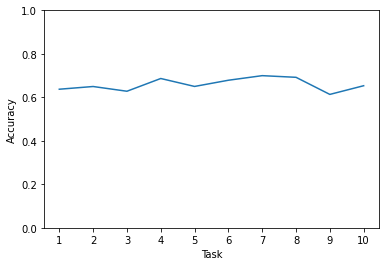

In [ ]:
import matplotlib.pyplot as plt

final_acc[9] = 0.6534
x = list(range(1, 11))
y = final_acc

plt.plot(x, y)
plt.xlabel('Task')
plt.ylabel('Accuracy')
plt.ylim(0, 1)   
plt.xticks(x) 

plt.show()
plt.close()


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

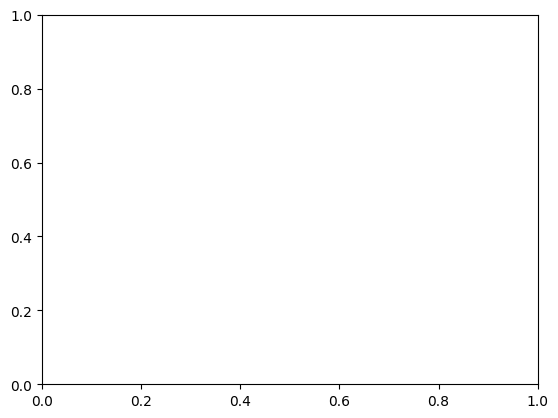

In [ ]:
import matplotlib.pyplot as plt

x = list(range(1, 6))
y = final_acc
y_lb = [0.28603515625, 0.4017578125, 0.4482421875, 0.4599609375, 0.7034]
plt.plot(x, y, label = "Power-Law")
plt.plot(x, y_lb, label = "Sequential")
plt.xlabel('Task')
plt.ylabel('Accuracy')
plt.ylim(0, 1)   
plt.xticks(x) 

plt.legend()
plt.show()
plt.close()


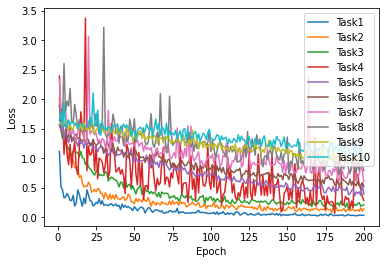

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Loss')

for i in range(1, 11):

  x = list(range(1, 201))
  y = torch.load("./checkpoint/model_Power_Law_context"+ str(i)+ ".pt")['loss']
  plt.plot(x, y, label = "Task" + str(i))

plt.legend()
plt.show()

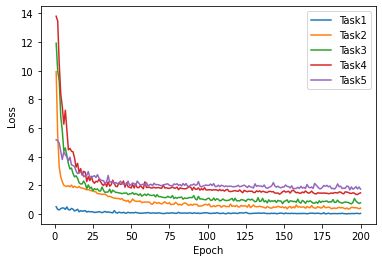

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Loss')

for i in range(1, 6):

  x = list(range(1, 201))
  y = torch.load("./checkpoint/model_LB_context"+ str(i)+ ".pt")['loss']
  plt.plot(x, y, label = "Task" + str(i))

plt.legend()
plt.show()

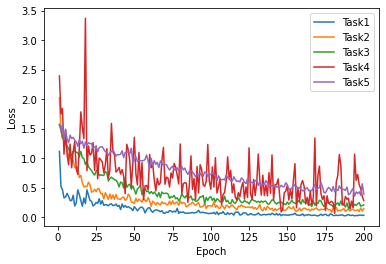

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Loss')

for i in range(1, 6):

  x = list(range(1, 201))
  y = torch.load("./checkpoint/model_Power_Law_context"+ str(i)+ ".pt")['loss']
  plt.plot(x, y, label = "Task" + str(i))

plt.legend()
plt.show()